Question: Can We classify the gender of the penguins using only physical characteristics?

### Libraries Used

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, f1_score

#### Importing Data

In [30]:
df = pd.read_csv(f'/home/kaykebk/Downloads/penguins_size.csv')

#### Showing data characteristics

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Here we can see how the columns are disposed, their types and quantity of data in it.

In [32]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [33]:
df.describe(include=object)

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


### Data Analysis and Visualization

#### Histograms

In [80]:
sns.set(style="darkgrid")

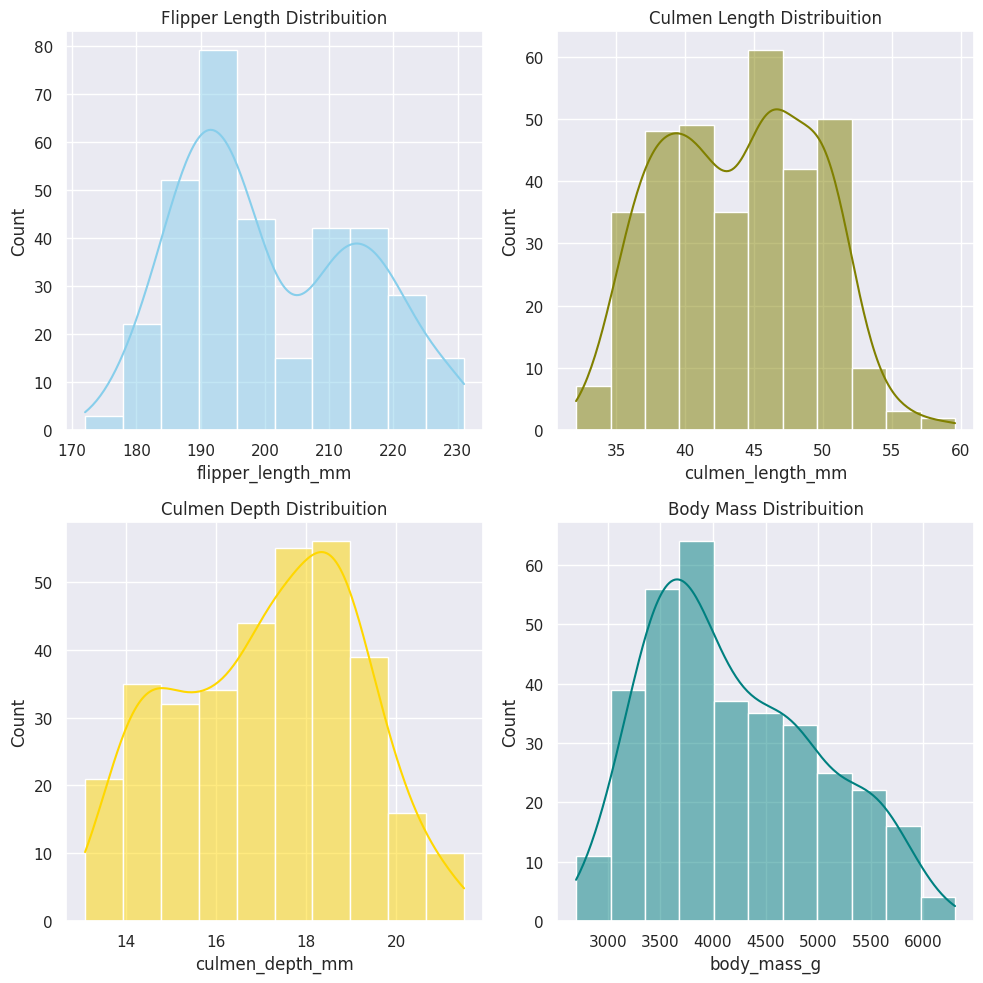

In [105]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=df, x='flipper_length_mm', kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title('Flipper Length Distribuition')
sns.histplot(data=df, x='culmen_length_mm', kde=True, color="olive", ax=axs[0, 1])
axs[0, 1].set_title('Culmen Length Distribuition')
sns.histplot(data=df, x='culmen_depth_mm', kde=True, color="gold", ax=axs[1, 0])
axs[1, 0].set_title('Culmen Depth Distribuition')
sns.histplot(data=df, x='body_mass_g', kde=True, color="teal", ax=axs[1, 1])
axs[1, 1].set_title('Body Mass Distribuition')

plt.tight_layout()

plt.show()

Here we can see how the data are distributed between the features.

Flipper Length: The distribuition shows that possibly are three different groups of penguins with distinct flipper length.

Culmen Length: The distribuition shows that probably are 2 distinct groups of penguins with different culmen lengths.

Culmen Depth: Shows basically the same of Culmen Length, but less pronounced than lenght.

Body Mass: Shows that the majority of penguins weight are between 3500g and 4500g.

#### Box Plots

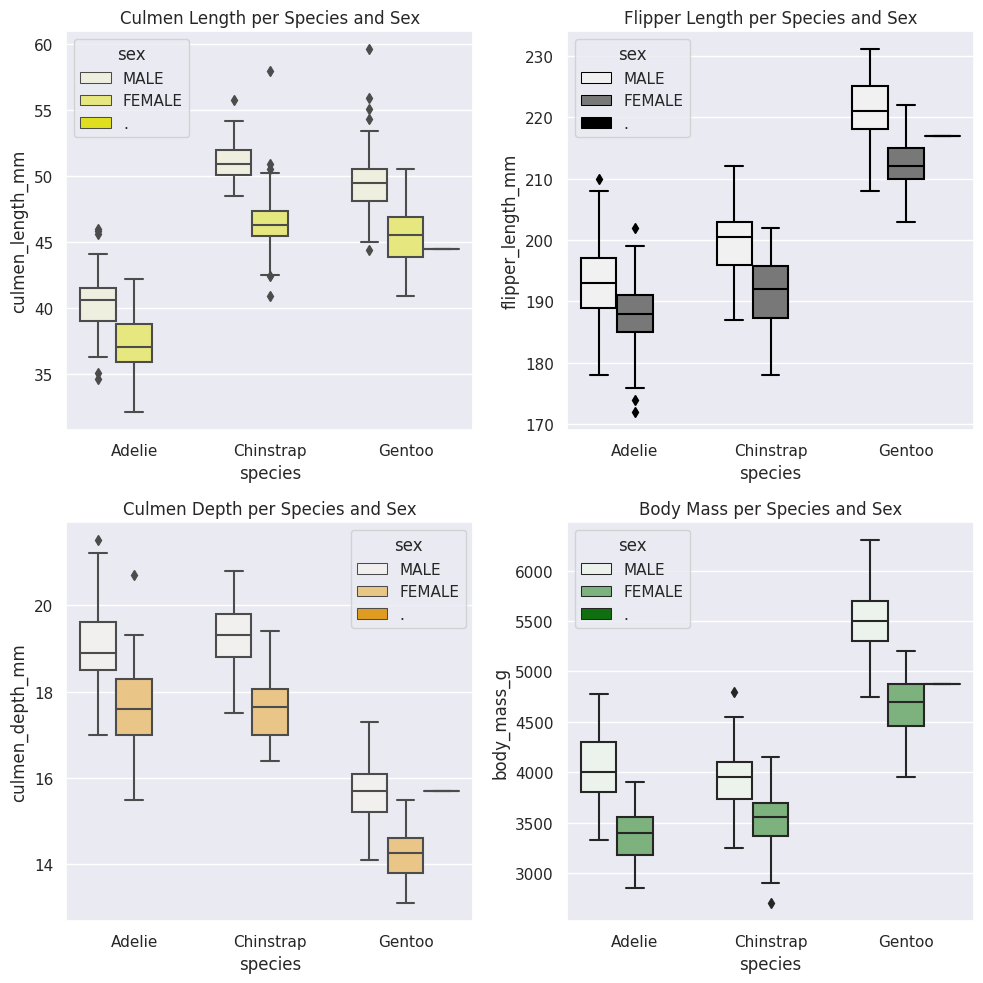

In [120]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.boxplot(data=df, y='culmen_length_mm', x='species', hue='sex', ax=axs[0, 0], color='yellow')
axs[0, 0].set_title('Culmen Length per Species and Sex')
sns.boxplot(data=df, y='flipper_length_mm', x='species', hue='sex', ax=axs[0, 1], color='black')
axs[0, 1].set_title('Flipper Length per Species and Sex')
sns.boxplot(data=df, y='culmen_depth_mm', x='species', hue='sex', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Culmen Depth per Species and Sex')
sns.boxplot(data=df, y='body_mass_g', x='species', hue='sex', ax=axs[1, 1], color='green')
axs[1, 1].set_title('Body Mass per Species and Sex')

plt.tight_layout()

plt.show()

### Heatmap and Variable Selection

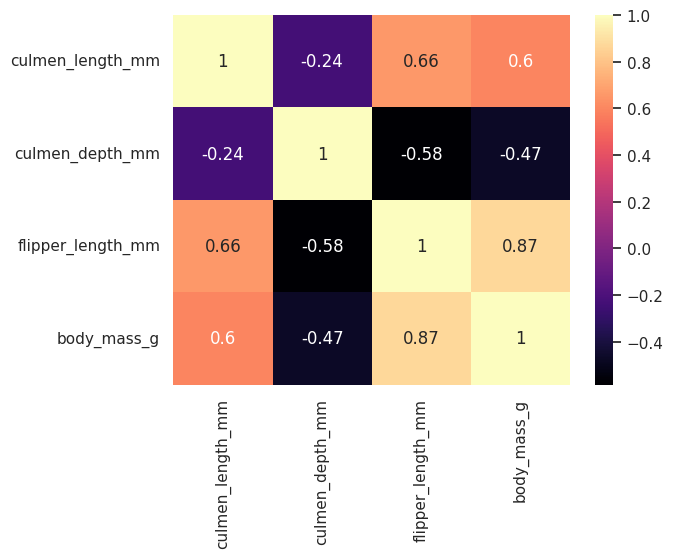

In [124]:
sns.heatmap(df.corr(numeric_only=True), cmap='magma', annot=True)

plt.show()

Since there's high correlation between flipper_length_mm and body_mass_g, they're going to be used
to train the models and sex will be the target of this classification.

#### Transforming sex feature into 0 and 1

In [126]:
df['sex'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})

#### Checking if there are null values

In [127]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

##### Since there are null values, we'll be using Simple Imputer to fill null data

In [128]:
imputer = SimpleImputer(strategy='most_frequent')

In [129]:
df.iloc[:,:] = imputer.fit_transform(df)

In [130]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Testing Multiple Classifiers

Splitting data into train and test dataset

I'm using multiple classifiers to see how they perform into this binary classification task.

SVM: The SVM Algorithm is largely used in binary classification, specially in NLP tasks. I've chosen this algorithm because of how it works, taking te binary data and seaching for the best hyperplane to segment the data.

Naive Bayes: 

In [131]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [132]:
train_X = train[['flipper_length_mm', 'body_mass_g']]
train_y = train['sex']

test_X = test[['flipper_length_mm', 'body_mass_g']]
test_y = test['sex']

#### SVM

In [133]:
model = SVC(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print(f"Accuracy of SVC is {accuracy_score(test_y, prediction)}")
print(f"Precision of SVC is {precision_score(test_y, prediction, labels=df['sex'].unique(), average='weighted')}")
print(f"F1 Score of SVC is {f1_score(test_y, prediction)}")

Accuracy of SVC is 0.6923076923076923
Precision of SVC is 0.6932752781809385
F1 Score of SVC is 0.6799999999999999


#### Naive Bayes

In [149]:
model = GaussianNB()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print(f"Accuracy of Naive Bayes is {accuracy_score(test_y, prediction)}")
print(f"Precision of Naive Bayes is {precision_score(test_y, prediction, labels=df['sex'].unique(), average='weighted')}")
print(f"F1 Score of Naive Bayes is {f1_score(test_y, prediction)}")

Accuracy of Naive Bayes is 0.5865384615384616
Precision of Naive Bayes is 0.604918108207582
F1 Score of Naive Bayes is 0.6260869565217392


#### Random Forest

In [134]:
model = RandomForestClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print(f"Accuracy of Random Forest is {accuracy_score(test_y, prediction)}")
print(f"Precision of Random Forest is {precision_score(test_y, prediction, labels=df['sex'].unique(), average='weighted')}")
print(f"F1 Score of Random Forest is {f1_score(test_y, prediction)}")

Accuracy of Random Forest is 0.7884615384615384
Precision of Random Forest is 0.7884184684296666
F1 Score of Random Forest is 0.7708333333333333


#### Ada Boost

In [135]:
model = AdaBoostClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print(f"Accuracy of Ada Boost is {accuracy_score(test_y, prediction)}")
print(f"Precision of Ada Boost is {precision_score(test_y, prediction, labels=df['sex'].unique(), average='weighted')}")
print(f"F1 Score of Ada Boost is {f1_score(test_y, prediction)}")

Accuracy of Ada Boost is 0.8076923076923077
Precision of Ada Boost is 0.8086773866434882
F1 Score of Ada Boost is 0.7872340425531914


#### Gradient Boosting

In [136]:
model = GradientBoostingClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print(f"Accuracy of Gradient Boosting is {accuracy_score(test_y, prediction)}")
print(f"Precision of Gradient Boosting is {precision_score(test_y, prediction, labels=df['sex'].unique(), average='weighted')}")
print(f"F1 Score of Gradient Boosting is {f1_score(test_y, prediction)}")

Accuracy of Gradient Boosting is 0.8365384615384616
Precision of Gradient Boosting is 0.8368447293447294
F1 Score of Gradient Boosting is 0.8282828282828283


#### Hist Gradient Boosting

In [137]:
model = HistGradientBoostingClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print(f"Accuracy of Hist Gradient Boosting is {accuracy_score(test_y, prediction)}")
print(f"Precision of Hist Gradient Boosting is {precision_score(test_y, prediction, labels=df['sex'].unique(), average='weighted')}")
print(f"F1 Score of Hist Gradient Boosting is {f1_score(test_y, prediction)}")

Accuracy of Hist Gradient Boosting is 0.8076923076923077
Precision of Hist Gradient Boosting is 0.8086773866434882
F1 Score of Hist Gradient Boosting is 0.7872340425531914


#### Decision Tree

In [138]:
model = DecisionTreeClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print(f"Accuracy of Decision Tree is {accuracy_score(test_y, prediction)}")
print(f"Precision of Decision Tree is {precision_score(test_y, prediction, labels=df['sex'].unique(), average='weighted')}")
print(f"F1 Score of Decision Tree is {f1_score(test_y, prediction)}")

Accuracy of Decision Tree is 0.7403846153846154
Precision of Decision Tree is 0.7407621082621083
F1 Score of Decision Tree is 0.7272727272727272


#### KNN

In [139]:
model = KNeighborsClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print(f"Accuracy of KNN is {accuracy_score(test_y, prediction)}")
print(f"Precision of KNN is {precision_score(test_y, prediction, labels=df['sex'].unique(), average='weighted')}")
print(f"F1 Score of KNN is {f1_score(test_y, prediction)}")

Accuracy of KNN is 0.7211538461538461
Precision of KNN is 0.7209592319225003
F1 Score of KNN is 0.6947368421052631


### Results

As we can see, Gradient Boost reached the higher metrics results on this subject. However, most of the models performed almost equally, except MLP and SVM.

I want to thank you for your time seeing this simple study, it's my first public study and I know there is some errors or inconsistencies, I would appreciate any advice or correction. 